In [1]:
# Make sure of false negative/positive values are actually correct

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Filtering
compas = pd.read_csv("compas-scores-two-years.csv")
compas = compas[compas['days_b_screening_arrest'] >= -30]
compas = compas[compas['days_b_screening_arrest'] <= 30]
compas

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
5,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0
6,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,...,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


# A

In [ ]:
# Should be a line plot

In [4]:
# Separate race
b = compas[compas['race'] == 'African-American']
b = b[b['two_year_recid'] == 1]
w = compas[compas['race'] == 'Caucasian']
w = w[w['two_year_recid'] == 1]

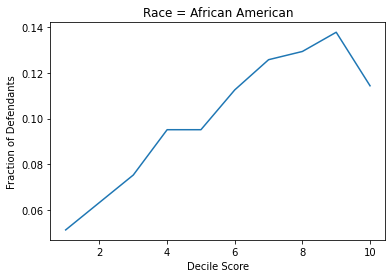

In [10]:
plt.title("Race = African American")
plt.xlabel("Decile Score")
b_counts = []
for i in range(1, 11):
    count = b[b['decile_score'] == i]
    b_counts.append(count.shape[0])

sum_c = sum(b_counts)
b_counts = [x/sum_c for x in b_counts]
plt.ylabel("Fraction of Defendants")
plt.plot([i for i in range(1, 11)], b_counts)

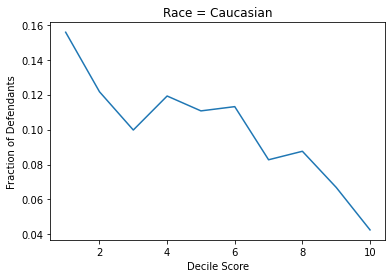

In [11]:
plt.title("Race = Caucasian")
plt.xlabel("Decile Score")
w_counts = []
for i in range(1, 11):
    count = w[w['decile_score'] == i]
    w_counts.append(count.shape[0])

sum_c = sum(w_counts)
w_counts = [x/sum_c for x in w_counts]
plt.ylabel("Fraction of Defendants")
plt.plot([i for i in range(1, 11)], w_counts)

# B

* Don't satisfy sufficiency. The probability of being in the 2 year rec ID score based on decile is definitely dependent on race, the sensitive characteristic. If they were sufficient, the two plots in A would have the same trajectory. 

# C

/Users/aishwaryamandyam/anaconda3/envs/research/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aishwaryamandyam/anaconda3/envs/research/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


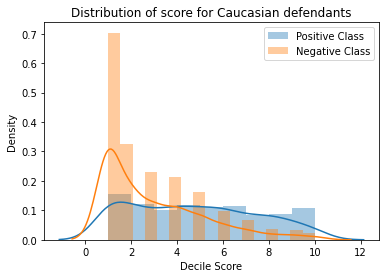

In [12]:
# White defendants
w = compas[compas['race'] == 'Caucasian']
w_p = w[w['two_year_recid'] == 1]
w_n = w[w['two_year_recid'] == 0]
plt.title("Distribution of score for Caucasian defendants")
sns.distplot(list(w_p['decile_score']), label='Positive Class')
sns.distplot(list(w_n['decile_score']), label='Negative Class')
plt.xlabel("Decile Score")
plt.legend()

/Users/aishwaryamandyam/anaconda3/envs/research/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aishwaryamandyam/anaconda3/envs/research/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


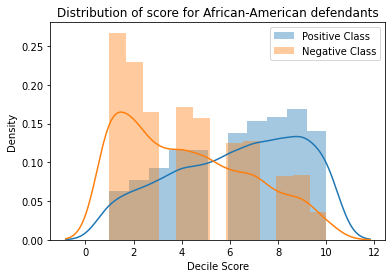

In [13]:
# Black defendants
b = compas[compas['race'] == 'African-American']
b_p = b[b['two_year_recid'] == 1]
b_n = b[b['two_year_recid'] == 0]
plt.title("Distribution of score for African-American defendants")
sns.distplot(list(b_p['decile_score']), label='Positive Class')
sns.distplot(list(b_n['decile_score']), label='Negative Class')
plt.xlabel("Decile Score")
plt.legend()

# D

* Not for either race. In white defendants, people in the positive class are split across decile scores uniformly. In black defendants, people in the positive class are highly likely to have higher decile scores. It seems like race plays a factor in the decile score. 

# E

## Positive Predictive Value

In [14]:
# Black defendants
b = compas[compas['race'] == 'African-American']
b_p = b[b['two_year_recid'] == 1]
num_positive = b_p.shape[0]
b_p_t = b_p[b_p['decile_score'] >= 4]
tp = b_p_t.shape[0]

print("Positive Predictive Value, Black: ", tp/num_positive)

Positive Predictive Value, Black:  0.8103552077062011


In [15]:
# White defendants
w = compas[compas['race'] == 'Caucasian']
w_p = w[w['two_year_recid'] == 1]
num_positive = w_p.shape[0]
w_p_t = w_p[w_p['decile_score'] >= 4]
tp = w_p_t.shape[0]

print("Positive Predictive Value, White: ", tp/num_positive)

Positive Predictive Value, White:  0.6228710462287105


## False Positive Rate

In [16]:
# Black defendants
b = compas[compas['race'] == 'African-American']
b_n = b[b['two_year_recid'] == 0]
num_negative = b_n.shape[0]

b_n_f = b_n[b_n['decile_score'] >= 4]
fp = b_n_f.shape[0]

print("False Positive Rate, Black: ", fp/num_negative)

Positive Predictive Value, Black:  0.5416116248348745


In [17]:
# White defendants
w = compas[compas['race'] == 'Caucasian']
w_n = w[w['two_year_recid'] == 0]
num_negative = w_n.shape[0]

w_n_f = w_n[w_n['decile_score'] >= 4]
fp = w_n_f.shape[0]

print("False Positive Rate, White: ", fp/num_negative)

Positive Predictive Value, White:  0.3333333333333333


## False Negative Rate

In [19]:
# Black defendants
b = compas[compas['race'] == 'African-American']
b_p = b[b['two_year_recid'] == 1]
num_positive = b_p.shape[0]
b_p_f = b_p[b_p['decile_score'] < 4]
fn = b_p_f.shape[0]

print("False Negative Rate, Black: ", fn/num_positive)

Positive Predictive Value, Black:  0.2847682119205298


In [21]:
# White defendants
w = compas[compas['race'] == 'Caucasian']
w_p = w[w['two_year_recid'] == 1]
num_positive = w_p.shape[0]
w_p_f = w_p[w_p['decile_score'] < 4]
fn = w_p_f.shape[0]

print("False Negative Rate, White: ", fn/num_positive)

Positive Predictive Value, Black:  0.49635036496350365


# F

In [31]:
def test_fpr_fnr(threshold_black, threshold_white):
    # Black defendants
    b = compas[compas['race'] == 'African-American']
    b_n = b[b['two_year_recid'] == 0]
    num_negative = b_n.shape[0]

    b_n_f = b_n[b_n['decile_score'] >= threshold_black]
    fp = b_n_f.shape[0]

    print("False Positive Rate, Black: ", fp/num_negative)

    # White defendants
    w = compas[compas['race'] == 'Caucasian']
    w_n = w[w['two_year_recid'] == 0]
    num_negative = w_n.shape[0]

    w_n_f = w_n[w_n['decile_score'] >= threshold_white]
    fp = w_n_f.shape[0]

    print("False Positive Rate, White: ", fp/num_negative)
    
    
    # Black defendants
    b = compas[compas['race'] == 'African-American']
    b_p = b[b['two_year_recid'] == 1]
    num_positive = b_p.shape[0]
    b_p_f = b_p[b_p['decile_score'] < threshold_black]
    fn = b_p_f.shape[0]

    print("False Negative Rate, Black: ", fn/num_positive)
    
    # White defendants
    w = compas[compas['race'] == 'Caucasian']
    w_p = w[w['two_year_recid'] == 1]
    num_positive = w_p.shape[0]
    w_p_f = w_p[w_p['decile_score'] < threshold_white]
    fn = w_p_f.shape[0]

    print("False Negative Rate, White: ", fn/num_positive)

In [39]:
test_fpr_fnr(5, 3)

False Positive Rate, Black:  0.4233817701453104
False Positive Rate, White:  0.45511319281811086
False Negative Rate, Black:  0.2847682119205298
False Negative Rate, White:  0.2773722627737226


* With a threshold of 5 for black defendants and a threshold of 3 for white defendants, we can get very similar FPR and FNR scores. 

In [40]:
# Black defendants
b = compas[compas['race'] == 'African-American']
b_p = b[b['two_year_recid'] == 1]
num_positive = b_p.shape[0]
b_p_t = b_p[b_p['decile_score'] >= 5]
tp = b_p_t.shape[0]

print("Positive Predictive Value, Black: ", tp/num_positive)

Positive Predictive Value, Black:  0.7152317880794702


In [41]:
# White defendants
w = compas[compas['race'] == 'Caucasian']
w_p = w[w['two_year_recid'] == 1]
num_positive = w_p.shape[0]
w_p_t = w_p[w_p['decile_score'] >= 3]
tp = w_p_t.shape[0]

print("Positive Predictive Value, White: ", tp/num_positive)

Positive Predictive Value, White:  0.7226277372262774


# G

In [42]:
young = compas[compas['age'] <= 25]
young_r = young[young['two_year_recid'] == 1]
print("Recidivism Rate for <= 25: ", young_r.shape[0]/young.shape[0])

Recidivism Rate for <= 25:  0.5514705882352942


In [43]:
old = compas[compas['age'] >= 50]
old_r = old[old['two_year_recid'] == 1]
print("Recidivism Rate for >= 50: ", old_r.shape[0]/old.shape[0])

Recidivism Rate for >= 50:  0.30469644902634596


# H

Under a theory of incarceration as incapacitation, if the only goal is reduce the rate of crime, it makes sense to incarcerate younger people that commit a crime at a higher rate than older people. This allows the rate of recidividism in younger people to decrease.

With a rehabilitative approach, it makes sense to refer younger people that commit a crime to rehabilitative service at a higher rate than older criminals. This in turn can help younger criminals not recidivate, thus lowering total crime. 

Under a retributive theory of justice, younger defendants are more blameworthy or may have less control over their actions due to environments that they are in. If a younger criminal is in an environment that is unsuitable and likely to inspire recidivism, the government should intervene and put them in more suitable environments. This is a higher level of intervention than rehabilitation, it is changing the environment. 